In [90]:
import Pkg; 

if split(pwd(),"/")[end] == "_paper_1"
    cd(joinpath(@__DIR__, "../../"))
    Pkg.activate("Project.toml")
end

using MorphoMol
using MorphoMolNotebooks
using CairoMakie

In [112]:
rsv = 0.425
eta_v = 0.5
pfv = MorphoMol.Energies.get_virial_prefactors(rsv, eta_v)
println(pfv ./ pfv[1])
rs = 0.325
pfb = MorphoMol.Energies.get_bugged_prefactors(1.0, rs, 0.45)
println(pfb ./ pfb[1])

[1.0, -0.2773876793844202, 0.08325840867725667, -0.008141504148629766]
[1.0, -0.23024300541735068, 0.08735096466108387, -0.0031796310289015847]


In [ ]:
rs = 1.0
eta = 0.25
pfv = MorphoMol.Energies.get_virial_prefactors(rs, eta)
println(pfv ./ pfv[1])
pf = MorphoMol.Energies.get_prefactors(rs, eta)
println(pf ./ pf[1])

[1.0, -0.6526768926692239, 0.46094620720972557, -0.10605663861435072]
[1.0, -0.656761683048208, 0.4732005783466779, -0.11422621937231893]


In [149]:
rs = 0.6
eta = 0.55
pfv = MorphoMol.Energies.get_virial_prefactors(rs, eta)

4-element Vector{Float64}:
 11.247928717531792
 -4.81171102869561
  2.2749127836037624
 -0.3790393440191371

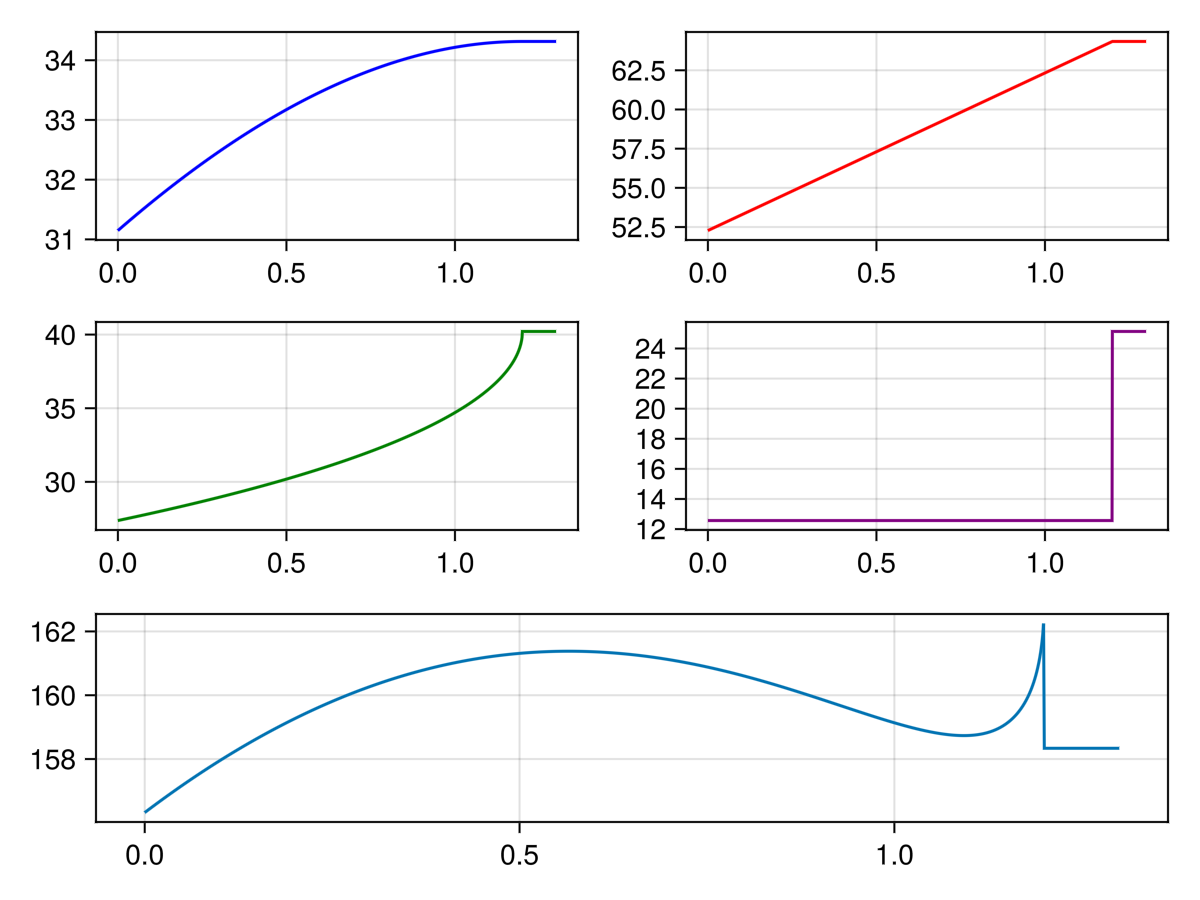

In [150]:
rs = 0.6
eta = 0.55
pfv = MorphoMol.Energies.get_virial_prefactors(rs, eta)
ds = 0.00:0.001:2*rs + 0.1
measures = [MorphoMol.Energies.get_geometric_measures([0.0, 0.0, 0.0, 2.0 + d, 0.0, 0.0], [1.0, 1.0], rs, 100.0) for d in ds]
Es = [sum(ms .* pfv) for ms in measures]
f = Figure()
ax = Axis(f[3, 1:2])
lines!(ax, ds, Es)

v_ax = Axis(f[1, 1])
lines!(v_ax, ds, [ms[1] for ms in measures], color = :blue)
a_ax = Axis(f[1, 2])
lines!(a_ax, ds, [ms[2] for ms in measures], color = :red)
c_ax = Axis(f[2, 1])
lines!(c_ax, ds, [ms[3] for ms in measures], color = :green)
x_ax = Axis(f[2, 2])
lines!(x_ax, ds, [ms[4] for ms in measures], color = :purple)

f

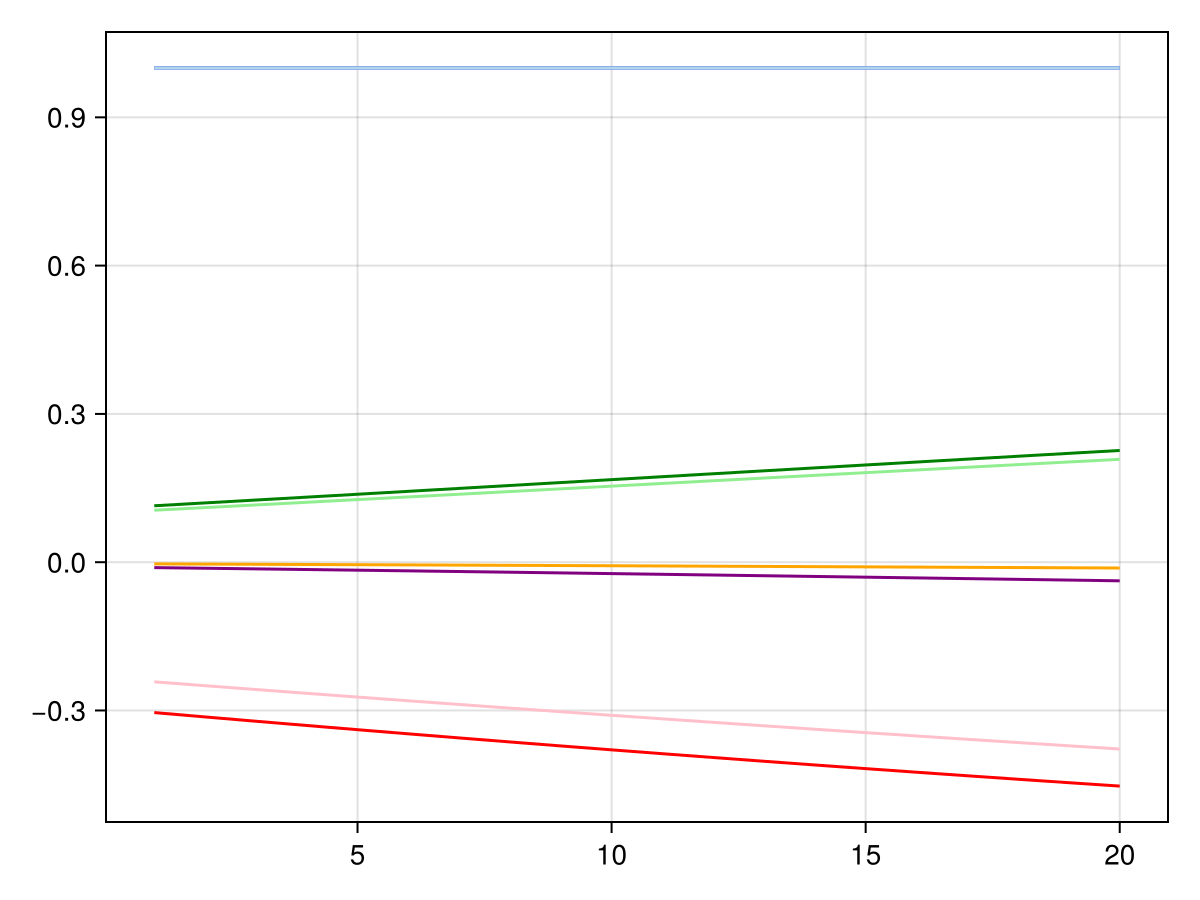

In [5]:
rs = 0.7
fig = Figure()
ps = []
sigs = []
kaps = []
kapbs = []
for eta in 0.3:0.01:0.49
    pf = MorphoMol.Energies.get_prefactors(rs, eta)
    push!(ps, 1.0)
    push!(sigs, pf[2]/pf[1])
    push!(kaps, pf[3]/pf[1])
    push!(kapbs, pf[4]/pf[1])
end
ax = Axis(fig[1, 1])
lines!(ax, 1:length(ps), ps, color = :blue)
lines!(ax, 1:length(sigs), sigs, color = :red)
lines!(ax, 1:length(kaps), kaps, color = :green)
lines!(ax, 1:length(kapbs), kapbs, color = :purple)

ps = []
sigs = []
kaps = []
kapbs = []
for eta in 0.3:0.01:0.49
    pf = MorphoMol.Energies.get_bugged_prefactors(1.0, 0.475, eta)
    push!(ps, 1.0)
    push!(sigs, pf[2]/pf[1])
    push!(kaps, pf[3]/pf[1])
    push!(kapbs, pf[4]/pf[1])
end
lines!(ax, 1:length(ps), ps, color = :lightblue)
lines!(ax, 1:length(sigs), sigs, color = :pink)
lines!(ax, 1:length(kaps), kaps, color = :lightgreen)
lines!(ax, 1:length(kapbs), kapbs, color = :orange)

fig

In [9]:
rs = 0.175
pf = MorphoMol.Energies.get_prefactors(rs, 0.475)
pf = pf ./ pf[1]
pf_b = MorphoMol.Energies.get_bugged_prefactors(1.0, rs, 0.4)
pf_b = pf_b ./ pf_b[1]
println(pf)
println(pf_b)

[1.0, -0.1106606876888922, 0.013581243700695632, -0.0005541205870581664]
[1.0, -0.10606687996149797, 0.021626062828823407, -0.00038286650465217247]
